# NBA Shot Data 3.d. :: Hypothesis Test 4

## Trevor Rowland :: 1-29-2025

This notebook uses MANOVA tests to examine if teams that make the playoffs and those who do not have the same average statistics. First, let's examine the data.

## 1. Importing Packages and Data, Examining Features

### 1.a. Importing Data and Packages

In [11]:
import pandas as pd
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/home/arch-db/Documents/github/bint-capstone/data-sources/game-level-dataset.csv')
df2 = pd.read_csv('/home/arch-db/Documents/github/bint-capstone/data-sources/game-level-dataset-cleaned.csv')

df.head()

,meta.version,meta.request,meta.time,boxScoreTraditional.gameId,boxScoreTraditional.awayTeamId,boxScoreTraditional.homeTeamId,boxScoreTraditional.homeTeam.teamId,boxScoreTraditional.homeTeam.teamCity,boxScoreTraditional.homeTeam.teamName,boxScoreTraditional.homeTeam.teamTricode,...,boxScoreTraditional.awayTeam.bench.blocks,boxScoreTraditional.awayTeam.bench.turnovers,boxScoreTraditional.awayTeam.bench.foulsPersonal,boxScoreTraditional.awayTeam.bench.points,boxScoreTraditional.homeTeam.bench,boxScoreTraditional.homeTeam.statistics,boxScoreTraditional.homeTeam.starters,boxScoreTraditional.awayTeam.statistics,boxScoreTraditional.awayTeam.starters,boxScoreTraditional.awayTeam.bench
0,1,http://nba.cloud/games/0040400407/boxscoretrad...,2023-08-10T15:58:36.5836Z,40400407,1610612765,1610612759,1610612759,San Antonio,Spurs,SAS,...,2.0,2.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,http://nba.cloud/games/0040400406/boxscoretrad...,2023-08-10T11:24:49.2449Z,40400406,1610612765,1610612759,1610612759,San Antonio,Spurs,SAS,...,1.0,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,http://nba.cloud/games/0040400405/boxscoretrad...,2023-08-10T15:58:11.5811Z,40400405,1610612759,1610612765,1610612765,Detroit,Pistons,DET,...,0.0,3.0,5.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,http://nba.cloud/games/0040400404/boxscoretrad...,2023-08-10T15:57:54.5754Z,40400404,1610612759,1610612765,1610612765,Detroit,Pistons,DET,...,2.0,4.0,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,http://nba.cloud/games/0040400403/boxscoretrad...,2023-08-10T15:57:41.5741Z,40400403,1610612759,1610612765,1610612765,Detroit,Pistons,DET,...,1.0,4.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2.head()

,GAME_ID,HOME_ID,HOME_NAME,HOME_TRICODE,HOME_MINUTES,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_ATTEMPTED,...,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_REBOUNDS_TOTAL,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,AWAY_FOULS_PERSONAL,AWAY_POINTS,AWAY_PLUS_MINUS_POINTS
0,40400407,1610612759,Spurs,SAS,240:00,29.0,68.0,0.426,7.0,11.0,...,8.0,26.0,34.0,17.0,8.0,6.0,6.0,24.0,74.0,-7.0
1,40400406,1610612759,Spurs,SAS,240:00,31.0,75.0,0.413,8.0,28.0,...,13.0,27.0,40.0,19.0,6.0,8.0,5.0,21.0,95.0,9.0
2,40400405,1610612765,Pistons,DET,265:00,37.0,84.0,0.440,2.0,9.0,...,19.0,26.0,45.0,20.0,3.0,3.0,16.0,26.0,96.0,1.0
3,40400404,1610612765,Pistons,DET,240:00,41.0,90.0,0.456,2.0,9.0,...,12.0,32.0,44.0,15.0,1.0,9.0,17.0,21.0,71.0,-31.0
4,40400403,1610612765,Pistons,DET,240:00,40.0,85.0,0.471,3.0,14.0,...,10.0,27.0,37.0,16.0,7.0,3.0,18.0,21.0,79.0,-17.0


Now that the data has been imported and converted to a pandas DataFrame, we can examine the features and select stats to compare in the MANOVA test.

In [8]:
print(f'Raw Data: {df.columns.tolist()}')
print(f'Raw Data: {df2.columns.tolist()}')

Raw Data: ['meta.version', 'meta.request', 'meta.time', 'boxScoreTraditional.gameId', 'boxScoreTraditional.awayTeamId', 'boxScoreTraditional.homeTeamId', 'boxScoreTraditional.homeTeam.teamId', 'boxScoreTraditional.homeTeam.teamCity', 'boxScoreTraditional.homeTeam.teamName', 'boxScoreTraditional.homeTeam.teamTricode', 'boxScoreTraditional.homeTeam.teamSlug', 'boxScoreTraditional.homeTeam.players', 'boxScoreTraditional.homeTeam.statistics.minutes', 'boxScoreTraditional.homeTeam.statistics.fieldGoalsMade', 'boxScoreTraditional.homeTeam.statistics.fieldGoalsAttempted', 'boxScoreTraditional.homeTeam.statistics.fieldGoalsPercentage', 'boxScoreTraditional.homeTeam.statistics.threePointersMade', 'boxScoreTraditional.homeTeam.statistics.threePointersAttempted', 'boxScoreTraditional.homeTeam.statistics.threePointersPercentage', 'boxScoreTraditional.homeTeam.statistics.freeThrowsMade', 'boxScoreTraditional.homeTeam.statistics.freeThrowsAttempted', 'boxScoreTraditional.homeTeam.statistics.freeThro

We can also see what data is missing using the `missingno` package.

NameError: name 'plt' is not defined

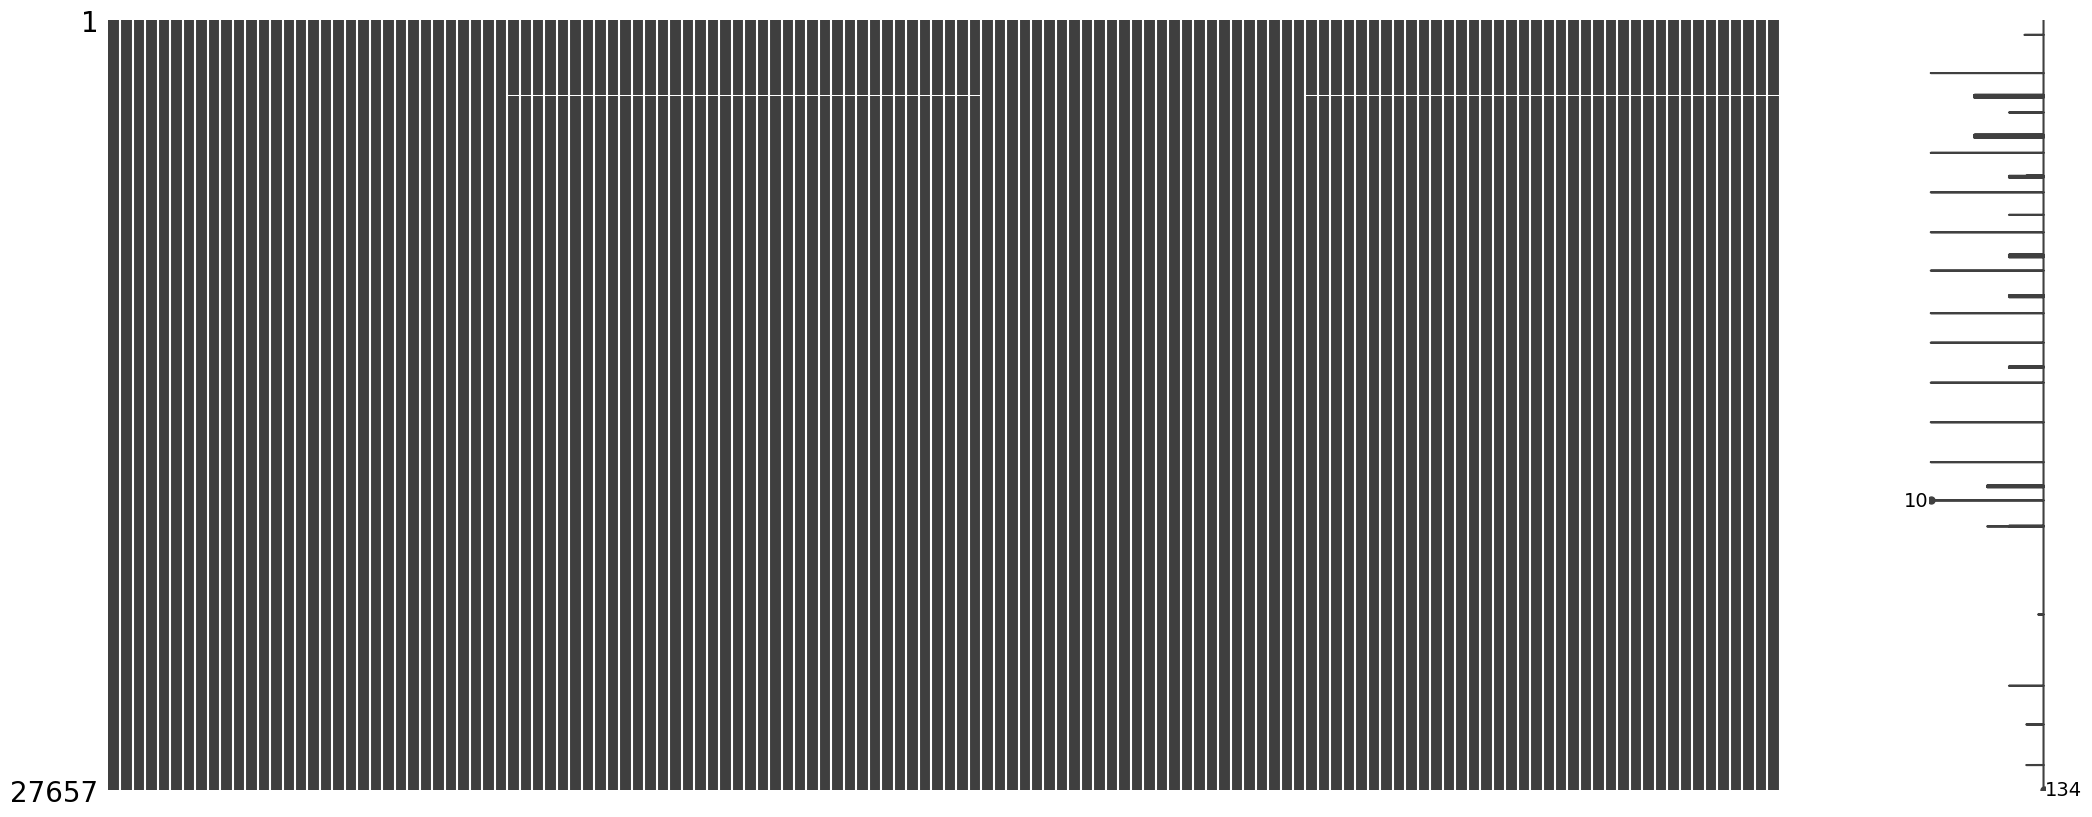

In [ ]:
msgo.matrix(df)

plt.show()